### Clustering

1)	Clustering identifies similarities between objects, which it groups according to those characteristics in common and which differentiate them from other groups of objects. These groups are known as "clusters".<br>
2)	Clustering is framed in unsupervised learning; that is, for this type of algorithm we only have one set of input data (not labeled), about which we must obtain information, without previously knowing what the output will be.<br>
3)<b>	There is no need to split the data in training and testing dataset.</b>


### KMeans

1)	K-means algorithm is an iterative algorithm that tries to partition the dataset into<b> K pre-defined distinct non-overlapping subgroups (clusters)</b> where each data point belongs to only one group<br>
2)	It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the<b> sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum.</b> The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.<br>
3)	Since clustering algorithms including KMeans which use distance-based measurements to determine the similarity between data points, it’s recommended to standardize or scale the data since almost always the features in any dataset would have different units of measurements for instance as age vs. income.<br>


### K-Means Algorithm

1) Specify number of clusters K.<br>
2) Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.<br>
3) Keep iterating until there is no change to the centroids. i.e. assignment of data points to clusters isn’t changing.<br>
4) Compute the sum of the squared distance between data points and all centroids.<br>
5) Assign each data point to the closest cluster (centroid).<br>
6) Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.


<img src="kmeans1.png">

### Elbow Method to find the optimal number of clusters

Elbow method gives us an idea on what a good K number of clusters would be based on the WCSS (Within Cluster Sum fo Square) between data points and their assigned clusters’ centroids. We pick k at the spot where WCSS starts to flatten out and forms an elbow.

WCSS = sum of sqaured distance between between individual data points and its closest centroid for all the data points

#### Pros
1)	Simple to implement and understand.<br>
2)	It gives best results, when data sets are distinct

#### Cons
1)	The user has to specify K(number of clusters in the beginning)<br>
2)	Data is required to be scaling the data in most cases.<br>
3)	Centroids can be dragged by the outliers. <br>
4)	As the number of dimensions (number of columns/features) increases, it is recommended to us PCA to reduce dimensions.


## K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.columns = ['C_ID','Gener','Age','AnnualIncome','SpendingScore']
df.head()

,C_ID,Gener,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Problem Statement - Based on AnnualIncome and Spending Score, divide the data into different clsuters

In [10]:
x = df[['AnnualIncome','SpendingScore']].values
print(type(x))
print(x[:5])

<class 'numpy.ndarray'>
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


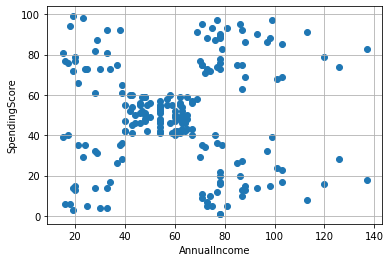

In [12]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

In [13]:
from sklearn.cluster import KMeans

WCSS
 [269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37239.835542456036, 30259.65720728547, 25044.967764018933, 21838.863692828912, 19787.670554966855, 17879.12850671165, 16106.827275665513, 14320.918182339483, 12882.609714044822, 12298.37262123841, 10853.202994227995, 9923.394611185915, 9280.662576553881, 8510.363083992032]


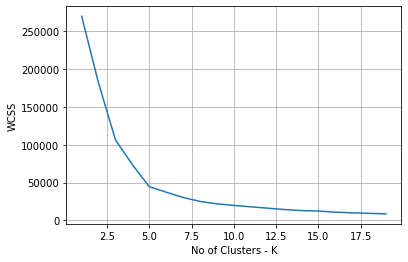

In [16]:
wcss = []
for i in range(1,20):          # i = 0,1,2,...19
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)
    
print('WCSS\n',wcss)
plt.plot(list(range(1,20)),wcss)
plt.xlabel('No of Clusters - K')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### Inference 
The optimal number of clusters is 5

### Silhoutte Score
1) It is a clustering perfroamnce metrics<br>
2) It ranges between 0 and 1<br>
3) The closes the values are to 1, the beteer the clusters.<br>
4) Formula =  (b-a)/max(b,a)<br>
where<br>
a = mean intra-cluster for each sample<br>
b = mean nearest-cluster distance for each sample

In [18]:
from sklearn.metrics import silhouette_score

In [24]:
for i in range(2,15):
    m = KMeans(n_clusters=i).fit(x)
    print(f'Silhoutte Score at Clusters {i} is {silhouette_score(x,m.labels_)}')

Silhoutte Score at Clusters 2 is 0.2968969162503008
Silhoutte Score at Clusters 3 is 0.46761358158775435
Silhoutte Score at Clusters 4 is 0.4931963109249047
Silhoutte Score at Clusters 5 is 0.553931997444648
Silhoutte Score at Clusters 6 is 0.53976103063432
Silhoutte Score at Clusters 7 is 0.5281944387251989
Silhoutte Score at Clusters 8 is 0.4572211842776841
Silhoutte Score at Clusters 9 is 0.4565077334305076
Silhoutte Score at Clusters 10 is 0.45925273534781125
Silhoutte Score at Clusters 11 is 0.43281354817246714
Silhoutte Score at Clusters 12 is 0.42562781293811897
Silhoutte Score at Clusters 13 is 0.44191709267031615
Silhoutte Score at Clusters 14 is 0.4239283876511737


#### Optimal number of clusters = 5

#### Appply KMeans at K=5

In [25]:
k5 = KMeans(n_clusters=5)
k5.fit(x)

KMeans(n_clusters=5)

In [26]:
ypred5 = k5.predict(x)
print(ypred5)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 4 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 4 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [27]:
cent5 = k5.cluster_centers_
print(cent5)

[[86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


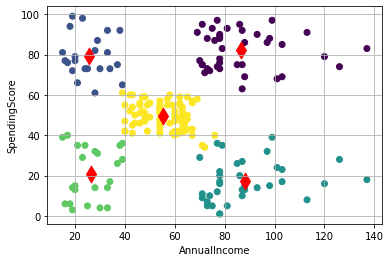

In [32]:
plt.scatter(x[:,0],x[:,1],c=ypred5)
plt.scatter(cent5[:,0],cent5[:,1],color='red',marker='d',s=140)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

### Applying KMeans at K=3

In [34]:
k3 = KMeans(n_clusters=3)
k3.fit(x)

KMeans(n_clusters=3)

In [35]:
ypred3 = k3.predict(x)
print(ypred3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [38]:
cent3 = k3.cluster_centers_
print(cent3)

[[44.15447154 49.82926829]
 [87.         18.63157895]
 [86.53846154 82.12820513]]


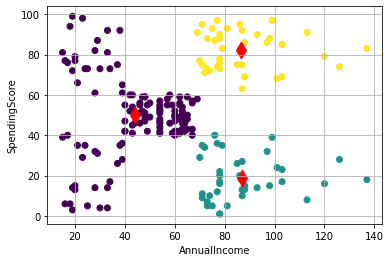

In [39]:
plt.scatter(x[:,0],x[:,1],c=ypred3)
plt.scatter(cent3[:,0],cent3[:,1],color='red',marker='d',s=140)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

#### Exercise
Q) For the same data,apply KMeans and generate the plot at 
1) K=4<br>
2) K=6<br>
3) K=7<br>
4) K=8<br>

### Mean-Shift Clustering Algorithm

1) We dont have to specify the number of clusters at the time of model creation<br>
2) It is based on a bandwidth paramater.<br>


### KMeans
1) We have to specify the number of clusters at the time of model creation.<br>
2) It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. <br>